In [1]:
# Transfer learning in image classification

In [2]:
'''In this notebook we will use transfer learning and take pre-trained model 
from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves 
lot of time and computational budget for new classification problem at hand'''

"In this notebook we will use transfer learning and take pre-trained model \nfrom google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves \nlot of time and computational budget for new classification problem at hand"

In [3]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Make predictions using ready made model (without any training)**

In [5]:
# by default the images we get from this dataset is 224X224, 
# so we also use 224X224 when training pre-trained model again
# input_shape=IMAGE_SHAPE+(3,), im also adding a 3rd dimension for channel.
IMAGE_SHAPE = (224, 224) 


classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [6]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

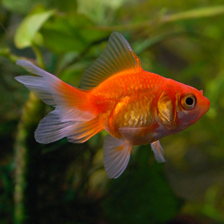

In [7]:
# im just loading a goldfish.jpg from my working directory and resizing it to 224X224X3
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

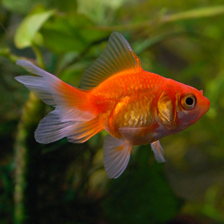

In [8]:
# gold fish is a image array
gold_fish

In [9]:
# scaling the image array to range between 0 and 1.
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [10]:
# np.newaxis at the start adds a new first dimension
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [11]:
'''
np.newaxis is used to create a batch of 1 image so that the model can process it.
Most deep learning frameworks (TensorFlow/Keras, PyTorch) expect inputs to have the shape
(batch_size, height, width, channels)
batch_size → number of images in the batch
height, width, channels → shape of each image

Now it can be fed directly into the model:
when we feed model of 1 image to predict function without any batch_size, it will give an error. prediction always accepts multiple models as input.
prediction = model.predict(gold_fish[np.newaxis, ...])
'''

'\nnp.newaxis is used to create a batch of 1 image so that the model can process it.\nMost deep learning frameworks (TensorFlow/Keras, PyTorch) expect inputs to have the shape\n(batch_size, height, width, channels)\nbatch_size → number of images in the batch\nheight, width, channels → shape of each image\n\nNow it can be fed directly into the model:\nwhen we feed model of 1 image to predict function without any batch_size, it will give an error. prediction always accepts multiple models as input.\nprediction = model.predict(gold_fish[np.newaxis, ...])\n'

In [12]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [13]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result
# This daaset contains 1000 clases. we are making predict for each clases.
# we are checking goldfish belongs to which class or not.
# class 0 have  0.22101453 probabilty, class 1 have 2.047488 probability like that...

1/1 [==============================] - 2s 2s/step


array([[ 0.22101453,  2.047488  ,  9.622561  , ..., -1.4621583 ,
        -0.28146583, -0.25984982]], dtype=float32)

In [14]:
result.shape # see total over 1000 classes

(1, 1001)

In [15]:
# np.argmax returns index with hight value.
predicted_label_index = np.argmax(result)
predicted_label_index
# here our class 2 have the most highest probaility 9.622561
# we can refer our ImageNetLabels.txt and verify that, class 2 is actually goldfish class.
# so it predicted it correct.

2

In [16]:
# just reading our file ImageNetLabels.txt which contains all the classes of the dataset.
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [17]:
# predicted_label_index is 2 , which gives our second class.
image_labels[predicted_label_index]

'goldfish'

In [18]:
# Load flowers dataset

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [20]:
data_dir # this is str path

'.\\datasets\\flower_photos'

In [21]:
import pathlib # converting to windows path object
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [22]:
list(data_dir.glob('*/*.jpg'))[:5] # by converting to windows path object, we can do functions like this.

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [24]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

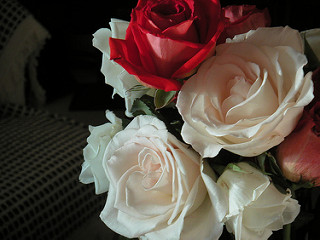

In [25]:

Image.open(str(roses[1]))

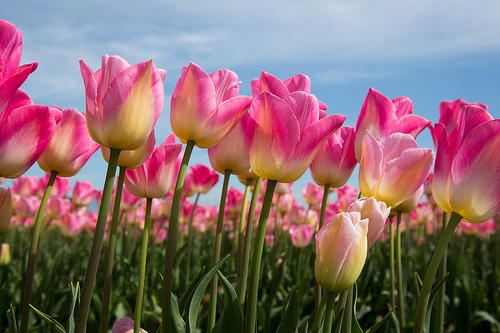

In [26]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[3]))

In [27]:
# Read flowers images from disk into numpy array using opencv

In [28]:
# key : flower_name, value : list of images
# this dict is images_dict
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
# key : flower_name, value : just assigning no.s from 0 to 4
# this dict is labels_dict
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [31]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [33]:
img.shape

(240, 179, 3)

In [34]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [35]:
X, y = [], []

# going through all images of images_dict . this is entering classes folder.eg /roses, /daisy etc..
for flower_name, images in flowers_images_dict.items():
    for image in images: # inside specific classes folder, select specific image. eg    .jpg image
        img = cv2.imread(str(image)) # read it.
        resized_img = cv2.resize(img,(224,224)) #resize it.
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) # we are using labels_dict of flowers created earlier, so we get number values associated with it.

In [36]:
X = np.array(X)
y = np.array(y)

In [37]:
X

array([[[[  0,  15,   6],
         [  0,  15,   6],
         [  0,  16,   7],
         ...,
         [ 24,  51,  31],
         [ 25,  52,  32],
         [ 26,  53,  33]],

        [[  8,  22,  14],
         [  8,  22,  14],
         [  7,  21,  14],
         ...,
         [ 21,  47,  31],
         [ 24,  49,  34],
         [ 25,  51,  35]],

        [[ 12,  22,  15],
         [ 12,  22,  15],
         [ 11,  22,  14],
         ...,
         [ 21,  43,  31],
         [ 24,  46,  33],
         [ 26,  48,  36]],

        ...,

        [[ 17,  29,  25],
         [ 14,  25,  20],
         [ 13,  22,  15],
         ...,
         [  2,  11,   2],
         [  0,   7,   1],
         [  0,   4,   0]],

        [[ 19,  30,  28],
         [ 18,  28,  25],
         [ 16,  25,  19],
         ...,
         [  2,  10,   2],
         [  1,   8,   2],
         [  0,   7,   2]],

        [[  9,  19,  19],
         [ 15,  23,  22],
         [ 19,  27,  24],
         ...,
         [  1,  11,   2],
        

In [38]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [39]:
# Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# Preprocessing: scale images

In [42]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [43]:
# Make prediction using pre-trained model on new flowers dataset

In [44]:
# dimension of 1st image
X[0].shape

(224, 224, 3)

In [45]:
# dimension of 2nd image
X[1].shape

(224, 224, 3)

In [46]:
## dimension of 3rd image
X[2].shape

(224, 224, 3)

In [47]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [48]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

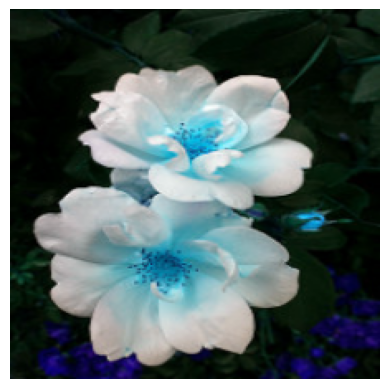

In [49]:
plt.axis('off')
plt.imshow(X[0])

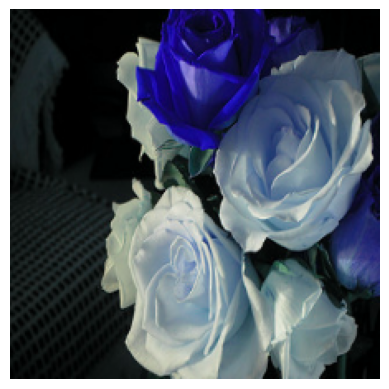

In [50]:
plt.axis('off')
plt.imshow(X[1])

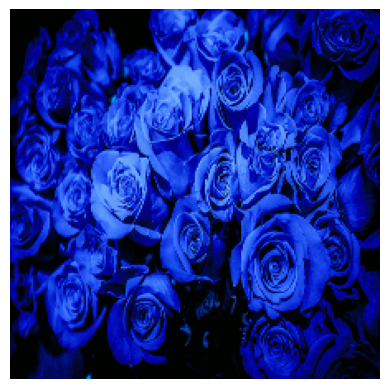

In [51]:
plt.axis('off')
plt.imshow(X[2])

In [52]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 2s 2s/step


array([795, 880, 795], dtype=int64)

In [53]:
image_labels[795] # image_labels is the variable where our ImageNetLabels.txt file is stoed

'shower curtain'

In [54]:
# Now take pre-trained model and retrain it using flowers images

In [55]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [56]:
'''
Load a pre-trained model URL
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
It was trained on ImageNet (millions of images)
feature_vector means:The final classification layer is removed | The model only extracts features from images |Think of it as a smart image feature detector

Load the model as a Keras layer
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False
)
hub.KerasLayer(...)
Loads the TensorFlow Hub model so it can be used inside Keras
input_shape=(224, 224, 3) | Images must be 224 × 224 pixels, 3 means RGB color channels
trainable=False | Freezes the pre-trained model | Its weights will NOT change during training | This prevents overfitting and speeds up training
You are reusing learned knowledge instead of training from scratch
'''


'\nLoad a pre-trained model URL\nfeature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"\nIt was trained on ImageNet (millions of images)\nfeature_vector means:The final classification layer is removed | The model only extracts features from images |Think of it as a smart image feature detector\n\nLoad the model as a Keras layer\npretrained_model_without_top_layer = hub.KerasLayer(\n    feature_extractor_model,\n    input_shape=(224, 224, 3),\n    trainable=False\n)\nhub.KerasLayer(...)\nLoads the TensorFlow Hub model so it can be used inside Keras\ninput_shape=(224, 224, 3) | Images must be 224 × 224 pixels, 3 means RGB color channels\ntrainable=False | Freezes the pre-trained model | Its weights will NOT change during training | This prevents overfitting and speeds up training\nYou are reusing learned knowledge instead of training from scratch\n'

In [57]:
num_of_flowers = 5 # Your dataset has 5 flower categories ie, daisy , dandelion, roses, sunflowers, tulips

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, # takes pretrained model without output layer.
  tf.keras.layers.Dense(num_of_flowers) # we add output layer (final layer) with 5 neurons densely connected to each other.
])

model.summary() # shows a brief summary : Number of layers | Output shapes | Number of parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [58]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5



86/86 [==============================] - 35s 300ms/step - loss: 0.7862 - acc: 0.7137
Epoch 2/5
86/86 [==============================] - 27s 311ms/step - loss: 0.4034 - acc: 0.8619
Epoch 3/5
86/86 [==============================] - 26s 308ms/step - loss: 0.3153 - acc: 0.8914
Epoch 4/5
86/86 [==============================] - 26s 304ms/step - loss: 0.2661 - acc: 0.9142
Epoch 5/5
86/86 [==============================] - 26s 305ms/step - loss: 0.2258 - acc: 0.9339


In [59]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 322ms/step - loss: 0.3682 - acc: 0.8715


[0.3682389557361603, 0.8714597225189209]